<a href="https://colab.research.google.com/github/tejlibre/Pre-DSI/blob/dev/DSI_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this Notebook

This notebook is a training assignment for the DSI program. The aim is to familiarise with basic tools used in data science, such as using pandas for handling dataframes, scikit learn and pytorch for machine learning.

This notebook is available in a [github repository](https://github.com/tejlibre/Pre-DSI)

# Contents

These are the tasks to be completed in this assignment

0. Access some historical IMDB data files from the shared drive: https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.

2. Drop duplicates in all the dataframes, if there are any.

3 Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe.

*  3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference.

*  3.2 Using the unique() method, compute how many different 'titleTypes' there are

4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are 
movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.

5. Add a new column to df_new with column title 'log10Votes' which gives the log_10 number of the 'numVotes' column.

6. Lower the case of all text in the 'genres' column.

7. Using Groupby (or other technique) group all data by 'genres' and display the top 10
highest genres by

*  7.1 mean number of log10Votes
 
*  7.2 mean averageRating

8. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes.

9. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

*  9.1 Using sklearn

*  9.2 Using scipy

*  9.3 Using pytorch

Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. If you wanted to build a better regression model what would you do?

10. You should commit at least three different versions of your notebook to your github account to demonstrate that you know the basics of using git for version control.

11. Share your notebook with us as a Google Colab notebook. NB: MAKE SURE TO MAKE IT PUBLIC. Include your github account in your Colab notebook intro and make sure your commits are public.



In [1]:

import numpy as np
import pandas as pd


# 0. Access some historical IMDB data files from the shared drive:
https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

In [2]:
# wget https://drive.google.com/uc?export=download&id=FILEID
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O FILENAME

#https://drive.google.com/file/d/1wWbLYAsVldXrnOxdJlu4URsPynYykY22/view?usp=sharing title.ratings.tsv.gz
#https://drive.google.com/file/d/1ctjnShHP2qNA1l2nKi1l4qWe3hE5SsPH/view?usp=sharing title.basics.tsv.gz
#https://drive.google.com/file/d/1jHKr1FOCigt15gVhrNmtHCHRgzzR1ZGc/view?usp=sharing title.akas.tsv.gz


#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wWbLYAsVldXrnOxdJlu4URsPynYykY22' -O title.ratings.tsv.gz
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ctjnShHP2qNA1l2nKi1l4qWe3hE5SsPH' -O title.basics.tsv.gz
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jHKr1FOCigt15gVhrNmtHCHRgzzR1ZGc' -O title.akas.tsv.gz

#gdown --folder --id '1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS'
# This chunk works.
!pip uninstall --yes gdown # After running this line, restart Colab runtime.

!pip install gdown -U --no-cache-dir

import gdown
#url = 'https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS'
#gdown.download_folder(url, quiet=True)


!gdown --fuzzy 'https://drive.google.com/file/d/1wWbLYAsVldXrnOxdJlu4URsPynYykY22/view?usp=sharing'
!gdown --fuzzy 'https://drive.google.com/file/d/1ctjnShHP2qNA1l2nKi1l4qWe3hE5SsPH/view?usp=sharing'
!gdown --fuzzy 'https://drive.google.com/file/d/1jHKr1FOCigt15gVhrNmtHCHRgzzR1ZGc/view?usp=sharing'


Found existing installation: gdown 3.6.4
Uninstalling gdown-3.6.4:
  Successfully uninstalled gdown-3.6.4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14262 sha256=f3f7a48b3902a12bc5ad976d06daeea4c7ad8f07449a09b708a4bcf695b3b87c
  Stored in directory: /tmp/pip-ephem-wheel-cache-uhlv7qzu/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
Downloading...
From: https://drive.google.com/uc?id=1wWbLYAsVldXrnOxdJlu4URsPynYykY22
To: /content/title.ratings.tsv.gz
100% 4.32M/4.32M [00:00<00:00, 76.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ctjnShHP2qNA1l2nKi1l4qWe3hE5SsPH
To: /content/title.basics.tsv.gz
100% 96.1M/96.1M [00:01<00:00, 66.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jHKr1FOCigt15gVhrNmtHCHRgzzR1ZGc
To: /content/title.akas.tsv.gz
100% 54.1M/54.1M [00:00<00:00, 

In [3]:
!gunzip *.gz
!ls -latr

total 632264
drwxr-xr-x 4 root root      4096 Dec 23 14:32 .config
drwxr-xr-x 1 root root      4096 Dec 23 14:32 sample_data
drwxr-xr-x 1 root root      4096 Jan 10 08:24 ..
-rw-r--r-- 1 root root  14866228 Jan 10 08:27 title.ratings.tsv
-rw-r--r-- 1 root root 452106547 Jan 10 08:28 title.basics.tsv
-rw-r--r-- 1 root root 180436875 Jan 10 08:28 title.akas.tsv
drwxr-xr-x 1 root root      4096 Jan 10 08:28 .


1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.


In [4]:
#ratings = pd.read_csv('./title.ratings.tsv')
#basics = pd.read_csv('./title.basics.tsv')
#akas = pd.read_csv('./title.akas.tsv')
# parse error, need to specify delimiter TAB
#ParserError: '	' expected after '"' : quotes used in cells so use argument quoting=3
ratings = pd.read_csv("./title.ratings.tsv", delimiter="\t", engine="python", quoting=3)
basics = pd.read_csv("./title.basics.tsv", delimiter="\t", engine="python", quoting=3)
akas = pd.read_csv("./title.akas.tsv", delimiter="\t", engine="python", quoting=3)


#  2. Drop duplicates in all the dataframes, if there are any.

In [5]:
ratings.count()

tconst           874203
averageRating    874203
numVotes         874203
dtype: int64

In [6]:
basics.count()

tconst            5330276
titleType         5330276
primaryTitle      5330270
originalTitle     5330270
isAdult           5330276
startYear         5330276
endYear           5330276
runtimeMinutes    5330276
genres            5330276
dtype: int64

In [7]:
akas.count()

titleId            3674735
ordering           3674735
title              3674735
region             3674678
language           3674735
types              3674735
attributes         3674735
isOriginalTitle    3674735
dtype: int64

In [8]:
ratings = ratings.drop_duplicates()
basics = basics.drop_duplicates()
akas = akas.drop_duplicates()

In [9]:
ratings.count()

tconst           874203
averageRating    874203
numVotes         874203
dtype: int64

In [10]:
basics.count()

tconst            5330276
titleType         5330276
primaryTitle      5330270
originalTitle     5330270
isAdult           5330276
startYear         5330276
endYear           5330276
runtimeMinutes    5330276
genres            5330276
dtype: int64

In [11]:
akas.count()

titleId            3674735
ordering           3674735
title              3674735
region             3674678
language           3674735
types              3674735
attributes         3674735
isOriginalTitle    3674735
dtype: int64

# 3.0 Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe.

3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference.

3.2 Using the unique() method, compute how many different 'titleTypes' there are


In [12]:
merge_inner = ratings
merge_inner = merge_inner.merge(basics, how='inner', left_on='tconst', right_on='tconst')
merge_inner = merge_inner.merge(akas, how='inner', left_on='tconst', right_on='titleId')
merge_inner.count()

tconst             1885165
averageRating      1885165
numVotes           1885165
titleType          1885165
primaryTitle       1885165
originalTitle      1885165
isAdult            1885165
startYear          1885165
endYear            1885165
runtimeMinutes     1885165
genres             1885165
titleId            1885165
ordering           1885165
title              1885165
region             1885157
language           1885165
types              1885165
attributes         1885165
isOriginalTitle    1885165
dtype: int64

In [13]:
merge_outer = ratings
merge_outer = merge_outer.merge(basics, how='outer', left_on='tconst', right_on='tconst')
merge_outer = merge_outer.merge(akas, how='outer', left_on='tconst', right_on='titleId')
merge_outer.count()

tconst             6910572
averageRating      2133310
numVotes           2133310
titleType          6910572
primaryTitle       6910566
originalTitle      6910566
isAdult            6910572
startYear          6910572
endYear            6910572
runtimeMinutes     6910572
genres             6910572
titleId            3674735
ordering           3674735
title              3674735
region             3674678
language           3674735
types              3674735
attributes         3674735
isOriginalTitle    3674735
dtype: int64

In [14]:
merge_inner.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,5.8,1422,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,5.8,1422,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,5.8,1422,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,5.8,1422,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,6.4,168,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [15]:
merge_outer.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,5.8,1422.0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,5.8,1422.0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,2.0,Карменсита,RU,\N,\N,\N,0
2,tt0000001,5.8,1422.0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,3.0,Carmencita,US,\N,\N,\N,0
3,tt0000001,5.8,1422.0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",tt0000001,4.0,Carmencita,\N,\N,original,\N,1
4,tt0000002,6.4,168.0,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1


In [16]:
titleTypes = merge_inner.titleType.unique()
print(titleTypes)
print(titleTypes.size)

['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']
10


In [17]:
titleTypes = merge_outer.titleType.unique()
print(titleTypes)
print(titleTypes.size)

['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' nan]
11


# 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are 
movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.

In [18]:
merge_inner.columns

Index(['tconst', 'averageRating', 'numVotes', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [19]:
merge_inner.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [20]:
merge_inner.language.unique()

array(['\\N', 'sv', 'en', 'tr', 'es', 'sr', 'cs', 'fa', 'fr', 'bg', 'ca',
       'nl', 'qbn', 'pt', 'ru', 'qbp', 'ar', 'rn', 'de', 'yi', 'uk', 'ka',
       'he', 'hr', 'sl', 'tg', 'sk', 'cmn', 'kk', 'da', 'el', 'fi', 'it',
       'gsw', 'pl', 'mr', 'qbo', 'gl', 'ms', 'th', 'ta', 'af', 'la', 'hy',
       'hi', 'ur', 'yue', 'te', 'bn', 'lt', 'mk', 'et', 'gd', 'tl', 'lv',
       'bs', 'cy', 'id', 'qal', 'goh', 'eu', 'ml', 'ro', 'hu', 'pa', 'uz',
       'ja', 'wo', 'no', 'is', 'sq', 'vi', 'ga', 'gu', 'nqo', 'kn', 'xh',
       'mi', 'ps', 'az', 'ky', 'fro', 'myv', 'ko', 'iu', 'st', 'zu', 'tn',
       'zh', 'ku'], dtype=object)

In [21]:
merge_inner.region.unique()

array(['HU', 'RU', 'US', '\\N', 'FR', 'RO', 'GB', 'PT', 'ES', 'UY', 'DE',
       'IT', 'FI', 'PL', 'AR', 'BR', 'XWW', 'TR', 'DK', 'XEU', 'SK', 'CZ',
       'SE', 'MX', 'GR', 'RS', 'XYU', 'AT', 'VE', 'CSHH', 'JP', 'AU',
       'NL', 'SI', 'NO', 'IR', 'UA', 'CA', 'CO', 'BG', 'BE', 'IN', 'DZ',
       'BF', 'XWG', 'NZ', 'VN', 'SUHH', 'EE', 'IS', 'DDDE', 'HR', 'CL',
       'LT', 'EG', 'GE', 'CH', 'PA', 'HK', 'CN', 'XSI', 'IE', 'XSA', 'PE',
       'IL', 'CU', 'KR', 'BA', 'BUMM', 'YUCS', 'XPI', 'BJ', 'PR', 'MY',
       'CM', 'AZ', 'ZA', 'TH', 'BO', 'DO', 'AL', 'EC', 'SG', 'LV', 'MA',
       'LI', 'LU', 'ID', 'PH', 'MZ', 'BM', 'PY', 'TW', 'JM', 'MD', 'LB',
       'TM', 'GL', 'MK', 'CR', 'TN', 'JO', 'KG', 'PK', 'LK', 'GT', 'XAS',
       'SN', 'TJ', 'NE', 'CI', 'MC', 'GH', 'TT', 'BS', 'SY', 'AO', 'KH',
       'GA', 'SV', 'MR', 'CY', 'ET', 'ML', 'NG', 'UZ', 'LY', 'SR', 'AM',
       'PG', 'IQ', 'BW', 'NI', 'ZM', 'CG', 'KZ', 'KP', 'XKO', 'GI', 'LA',
       'GW', 'BD', 'ZW', 'NP', 'BY', 'MN', 'FO', 

In [22]:
merge_inner[((merge_inner["language"]=="en") | (merge_inner["region"]=="US")) & (merge_inner["titleType"]=="movie")].loc[:,["primaryTitle","region","language"]]

,primaryTitle,region,language
51,Miss Jerry,US,\N
574,The Corbett-Fitzsimmons Fight,US,\N
1446,Hamlet,US,\N
1520,The Fairylogue and Radio-Plays,US,\N
1797,"Hamlet, Prince of Denmark",US,\N
...,...,...,...
1885040,Temporary Difficulties,US,\N
1885103,Bearer,XWW,en
1885112,Tuulte tahutud maa,XWW,en
1885138,Aickarakkonathe Bhishaguaranmaar,IN,en


In [23]:
df_new = merge_inner[((merge_inner["language"]=="en") | (merge_inner["region"]=="US")) & (merge_inner["titleType"]=="movie")]

# 5. Add a new column to df_new with column title 'log10Votes' which gives the log_10 number of the 'numVotes' column.


In [24]:
df_new["numVotes"]

51          70
574        266
1446        10
1520        26
1797        16
          ... 
1885040     20
1885103      9
1885112     17
1885138    213
1885140      8
Name: numVotes, Length: 179685, dtype: int64

In [25]:
df_new.loc[:,"log10Votes"]=np.log10(df_new["numVotes"])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [26]:
df_new["log10Votes"]

51         1.845098
574        2.424882
1446       1.000000
1520       1.414973
1797       1.204120
             ...   
1885040    1.301030
1885103    0.954243
1885112    1.230449
1885138    2.328380
1885140    0.903090
Name: log10Votes, Length: 179685, dtype: float64

#  7. Lower the case of all text in the 'genres' column.


In [27]:
df_new["genres"] = df_new["genres"].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 7. Using Groupby (or other technique) group all data by 'genres' and display the top 10
highest genres by

 7.1 mean number of log10Votes

 7.2 mean averageRating

In [28]:
mean_rating = df_new.groupby("genres")["averageRating"].mean()
mean_rating.sort_values(ascending=False).head(10)

genres
documentary,history,western        9.300000
history,sport                      9.200000
documentary,news,reality-tv        8.800000
animation,crime,documentary        8.525000
biography,history,music            8.500000
adventure,documentary,western      8.433333
documentary,drama,thriller         8.433333
comedy,mystery,sport               8.400000
biography,documentary,talk-show    8.300000
action,documentary,fantasy         8.300000
Name: averageRating, dtype: float64

In [29]:
mean_log10Votes = df_new.groupby("genres")["log10Votes"].mean()
mean_log10Votes.sort_values(ascending=False).head(10)

genres
action,fantasy,war            5.405722
action,family,romance         4.801753
animation,drama,war           4.396304
family,music,musical          4.396252
documentary,sport,thriller    4.386731
action,adventure,sci-fi       4.384822
horror,musical,sci-fi         4.340484
biography,fantasy,horror      4.271842
action,adventure,thriller     4.142012
adventure,drama,sci-fi        4.123983
Name: log10Votes, dtype: float64

# 8. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes.

In [30]:
ratings = df_new.groupby("averageRating")["log10Votes"].mean()

In [31]:
import matplotlib.pyplot as plt

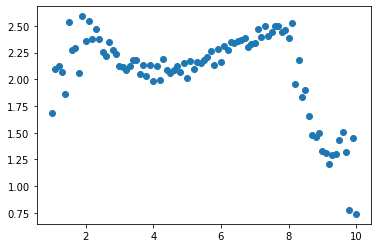

In [32]:
p = plt.scatter(ratings.index, ratings.values)

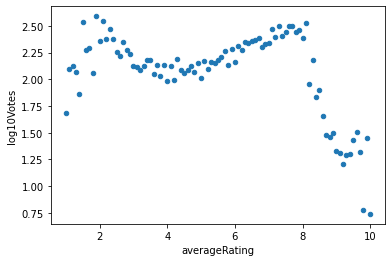

In [33]:
ratings.reset_index().plot(kind='scatter', x='averageRating', y='log10Votes')

#  9. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

*  9.1 Using sklearn

*  9.2 Using scipy

*  9.3 Using pytorch

Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. If you wanted to build a better regression model what would you do?


In [34]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
#extract x and y arrays
data = ratings.reset_index()

train = data.sample(frac=0.8, random_state=25)
test = data.drop(train.index)

x_train = train["averageRating"].to_numpy().reshape(-1,1)
y_train = train["log10Votes"].to_numpy().reshape(-1,1)

x_test = test["averageRating"].to_numpy().reshape(-1,1)
y_test = test["log10Votes"].to_numpy().reshape(-1,1)

In [36]:
# linear regression using scikitlearn

%time reg = LinearRegression().fit(x_train, y_train)
print("Coefficients: \n", reg.coef_)

# Evaluate
y_pred = reg.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

CPU times: user 3.23 ms, sys: 10 µs, total: 3.24 ms
Wall time: 21.6 ms
Coefficients: 
 [[-0.0828916]]
Mean squared error: 0.15
Coefficient of determination: -0.05


In [37]:
# linear regression using scipy
x_train2 = np.concatenate( x_train, axis=0 )
y_train2 = np.concatenate( y_train, axis=0 )

%time reg2 = stats.linregress(x_train2, y_train2)
print("Coefficients: \n", reg2.slope)

# Evaluate
y_pred2 = reg2.intercept + reg2.slope * x_test

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred2))


CPU times: user 990 µs, sys: 0 ns, total: 990 µs
Wall time: 1.21 ms
Coefficients: 
 -0.08289160469409297
Mean squared error: 0.15
Coefficient of determination: -0.05


In [61]:
# linear regression using pytorch

import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 1000

model = linearRegression(inputDim, outputDim)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [62]:
x_values_train = np.array(x_train, dtype=np.float32)
y_values_train = np.array(y_train, dtype=np.float32)

In [63]:
# Reset parameters before training
for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

# Training neural network
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(x_values_train))
    labels = Variable(torch.from_numpy(y_values_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(23.7377, grad_fn=<MseLossBackward0>)
epoch 0, loss 23.737707138061523
tensor(2.4680, grad_fn=<MseLossBackward0>)
epoch 1, loss 2.468022346496582
tensor(1.5228, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.5228382349014282
tensor(1.4722, grad_fn=<MseLossBackward0>)
epoch 3, loss 1.4722057580947876
tensor(1.4610, grad_fn=<MseLossBackward0>)
epoch 4, loss 1.4610050916671753
tensor(1.4516, grad_fn=<MseLossBackward0>)
epoch 5, loss 1.4516016244888306
tensor(1.4423, grad_fn=<MseLossBackward0>)
epoch 6, loss 1.4423385858535767
tensor(1.4331, grad_fn=<MseLossBackward0>)
epoch 7, loss 1.4331426620483398
tensor(1.4240, grad_fn=<MseLossBackward0>)
epoch 8, loss 1.424010157585144
tensor(1.4149, grad_fn=<MseLossBackward0>)
epoch 9, loss 1.4149409532546997
tensor(1.4059, grad_fn=<MseLossBackward0>)
epoch 10, loss 1.4059337377548218
tensor(1.3970, grad_fn=<MseLossBackward0>)
epoch 11, loss 1.3969889879226685
tensor(1.3881, grad_fn=<MseLossBackward0>)
epoch 12, loss 1.3881051540374756
tensor(1.3

In [64]:
x_values_test = np.array(x_test, dtype=np.float32)
y_values_test = np.array(y_test, dtype=np.float32)
with torch.no_grad(): # we don't need gradients in the testing phase
        y_pred3 = model(Variable(torch.from_numpy(x_values_test))).data.numpy()
print(y_pred3)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred3))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred3))

[[2.3790553]
 [2.3650782]
 [2.3580897]
 [2.3301356]
 [2.2812157]
 [2.2253075]
 [2.1903648]
 [2.1693993]
 [2.113491 ]
 [2.0785484]
 [2.07156  ]
 [2.0366173]
 [2.0016744]
 [1.9597433]
 [1.9527547]
 [1.903835 ]
 [1.8549154]
 [1.7570759]]
Mean squared error: 0.14
Coefficient of determination: 0.01


In [65]:
# find slope using scipy least square fitting

#print(x_test)
#print(y_pred3)

reg3 = stats.linregress(x_test.flatten(), y_pred3.flatten())
print("Coefficients: \n", reg3.slope)

Coefficients: 
 -0.06988532082606426


In [66]:
#print(y_pred)
#print(y_pred2)
#print(y_pred3)

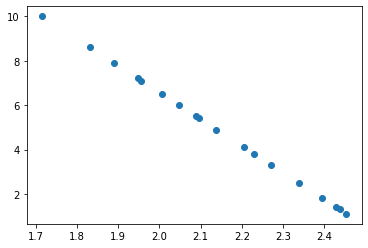

In [67]:
# scikit learn
predictions = plt.scatter(y_pred, x_test)

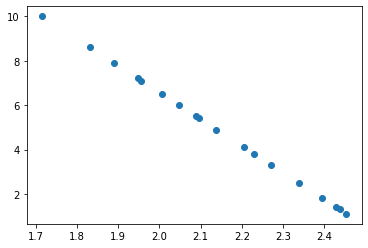

In [68]:
# scipy
predictions2 = plt.scatter(y_pred2, x_test)

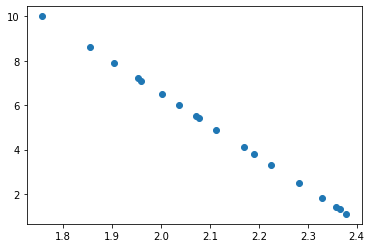

In [69]:

predictions3 = plt.scatter(y_pred3, x_test)

| *               | Coefficient |  mean sq error |
| -----------     | ----------- |----------------|
|  **scikitlearn**| -0.0828916  | 0.15           |
|  **scipy**      | -0.0828916  | 0.15           |
| **pytorch**     | -0.0828867  | 0.15           |

After 10000 epochs pytorch reaches the same results as with scikit learn and scipy. At 100 epochs with the current settings pytorch was not accurate at all. While it is more computationally intensive, pytorch can make better predictions even for non linear data, and so finding the slope in this case is not necessary.

To build a better regression model, we can consider more independent variables and treat it as a multivariable regression model, with more coeeficients:

Instead of y = mx + c
f(x1,x2,x3) = w1.x1 + w2.x2 + w3.x3 + ... 